<p style="font-family: Arial; font-size:3.75em;color:purple; font-style:bold"><br>
Satellite Image Data <br><br><br>Analysis using numpy</p>

<p style="font-family: Arial; font-size:1.75em;color:#2462C0; font-style:bold"><br>Data Source: Satellite Image from WIFIRE Project</p>


WIFIRE is an integrated system for wildfire analysis, with specific regard to changing urban dynamics and climate. The system integrates networked observations such as heterogeneous satellite data and real-time remote sensor data, with computational techniques in signal processing, visualization, modeling, and data assimilation to provide a scalable method to monitor such phenomena as weather patterns that can help predict a wildfire's rate of spread. You can read more about WIFIRE at: https://wifire.ucsd.edu/

In this example, we will analyze a sample satellite image dataset from WIFIRE using the numpy Library.


<p style="font-family: Arial; font-size:1.75em;color:#2462C0; font-style:bold">Loading the libraries we need: numpy, imageio, matplotlib</p>

In [1]:
%matplotlib inline
import numpy as np
import imageio
import matplotlib.pyplot as plt

<p style="font-family: Arial; font-size:1.75em;color:#2462C0; font-style:bold">
Creating a numpy array from an image file:</p> 

<br>
Lets choose a WIFIRE satellite image file as an ndarray and display its type.


In [2]:
#from skimage import data

photo_data = imageio.imread('./wifire/sd-3layers.jpg')

Let's see what is in this image. 

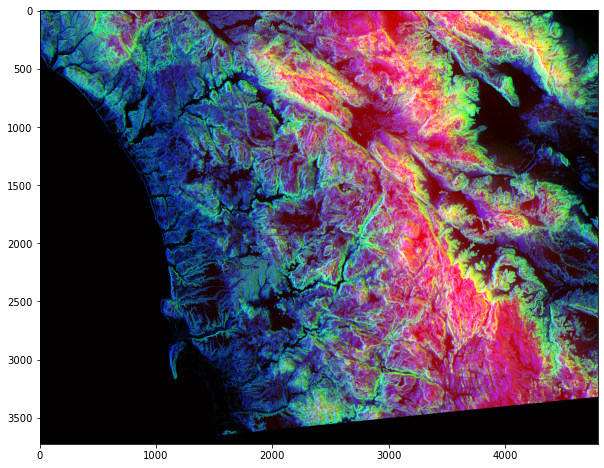

In [3]:
plt.figure(figsize=(10,10))
plt.imshow(photo_data)

In [4]:
### Print the type and shape of the image 

(3725, 4797, 3)

The shape of the ndarray show that it is a three layered matrix. The first two numbers here are length and width, and the third number (i.e. 3) is for three layers: Red, Green and Blue.

<p style="font-family: Arial; font-size:1.75em;color:#2462C0; font-style:bold">
RGB Color Mapping in the Photo:</p> <br>
<ul>
<li><p style="font-family: Arial; font-size:1.75em;color:red; font-style:bold">
RED pixel indicates Altitude</p>
<li><p style="font-family: Arial; font-size:1.75em;color:blue; font-style:bold">
BLUE pixel indicates Aspect
</p>
<li><p style="font-family: Arial; font-size:1.75em;color:green; font-style:bold">
GREEN pixel indicates Slope
</p>
</ul>
<br>
The higher values denote higher altitude, aspect and slope.


In [5]:
# print the total number of elements in the data 

53606475

In [6]:
# get the minimum and maximum pixel values in the image 

(0, 255)

In [7]:
# get the mean values of the image including overall mean, mean along width of the image, height of the image and channel wise mean of the image

75.8299354508947

<p style="font-family: Arial; font-size:1.75em;color:#2462C0; font-style:bold"><br>

Pixel on the 150th Row and 250th Column</p>

In [8]:
# Get the part of image along height (y) axis 150 to 200 and along x axis (150 to 200) and display it 
image_patch = ?
plt.imshow(image_patch)
plt.show()

Array([ 17,  35, 255], dtype=uint8)

<p style="font-family: Arial; font-size:1.75em;color:#2462C0; font-style:bold"><br>
Set a Pixel to All Zeros</p>
<br/>
We can set all three layer in a pixel as once by assigning zero globally to that (row,column) pairing. However, setting one pixel to zero is not noticeable.

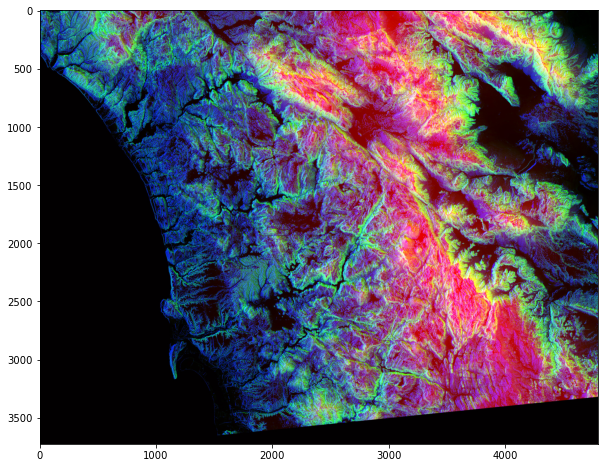

In [10]:
#photo_data = misc.imread('./wifire/sd-3layers.jpg')
photo_data[150, 250] = 0
plt.figure(figsize=(10,10))
plt.imshow(photo_data)

<p style="font-family: Arial; font-size:1.75em;color:#2462C0; font-style:bold"><br>
Changing colors in a Range<p/>
<br/>
We can also use a range to change the pixel values. As an example, let's set the green layer for rows 200 t0 800 to full intensity.

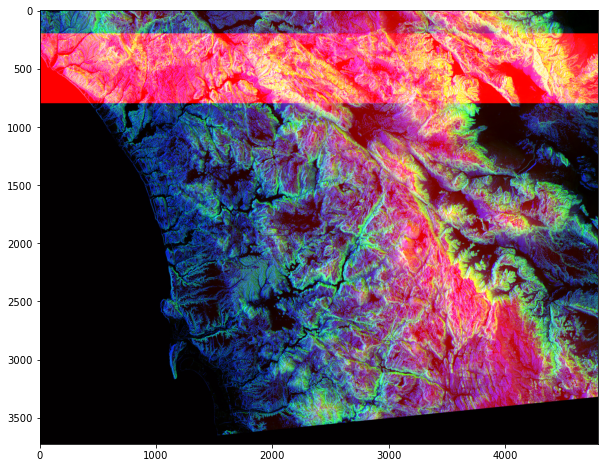

In [11]:
photo_data = imageio.imread('./wifire/sd-3layers.jpg')

photo_data[200:800, : ,0] = 255
plt.figure(figsize=(10,10))
plt.imshow(photo_data)

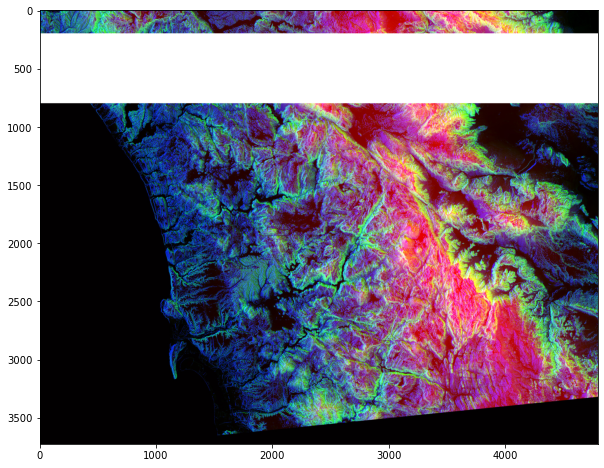

In [12]:
# if 255 represents white color and 0 represents black color how can you replace white color in the selected area
photo_data = imageio.imread('./wifire/sd-3layers.jpg')

photo_data[200:800, :] = ?
plt.figure(figsize=(10,10))
plt.imshow(photo_data)

<p style="font-family: Arial; font-size:1.75em;color:#2462C0; font-style:bold"><br>
Pick all Pixels with Low Values</p>

In [14]:
photo_data = imageio.imread('./wifire/sd-3layers.jpg')
print("Shape of photo_data:", photo_data.shape)
low_value_filter = photo_data < 200
print("Shape of low_value_filter:", low_value_filter.shape)

Shape of photo_data: (3725, 4797, 3)
Shape of low_value_filter: (3725, 4797, 3)


<p style="font-family: Arial; font-size:1.75em;color:#2462C0; font-style:bold">
Filtering Out Low Values</p><br/>
Whenever the low_value_filter is True, set value to 0.

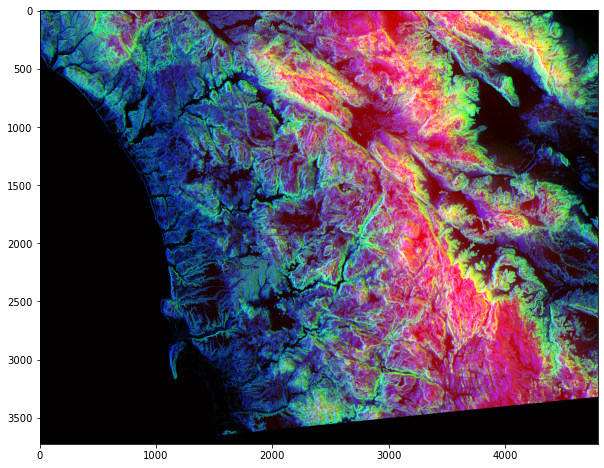

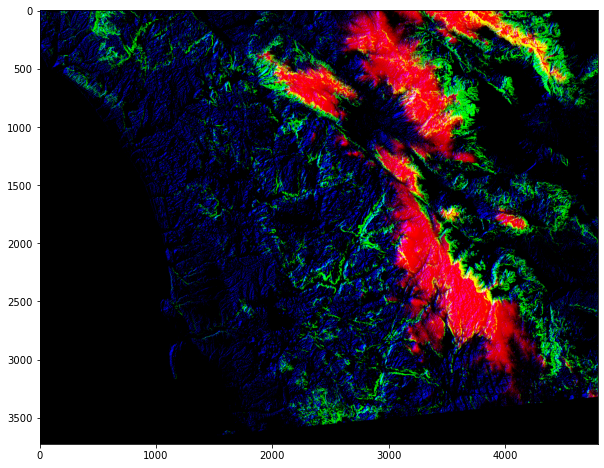

In [15]:
# replace all low value pixels to black  
plt.figure(figsize=(10,10))
plt.imshow(photo_data)
? = ?
plt.figure(figsize=(10,10))
plt.imshow(photo_data)

In [ ]:
# Filter out high value images (any pixel having value > 150 should be converted to white color)

<p style="font-family: Arial; font-size:1.75em;color:#2462C0; font-style:bold">
More Row and Column Operations</p><br>
You can design complex patters by making cols a function of rows or vice-versa. Here we try a linear relationship between rows and columns.

In [16]:
rows_range = np.arange(len(photo_data))
cols_range = rows_range
print(type(rows_range))

<class 'numpy.ndarray'>


In [17]:
photo_data[rows_range, cols_range] = 255

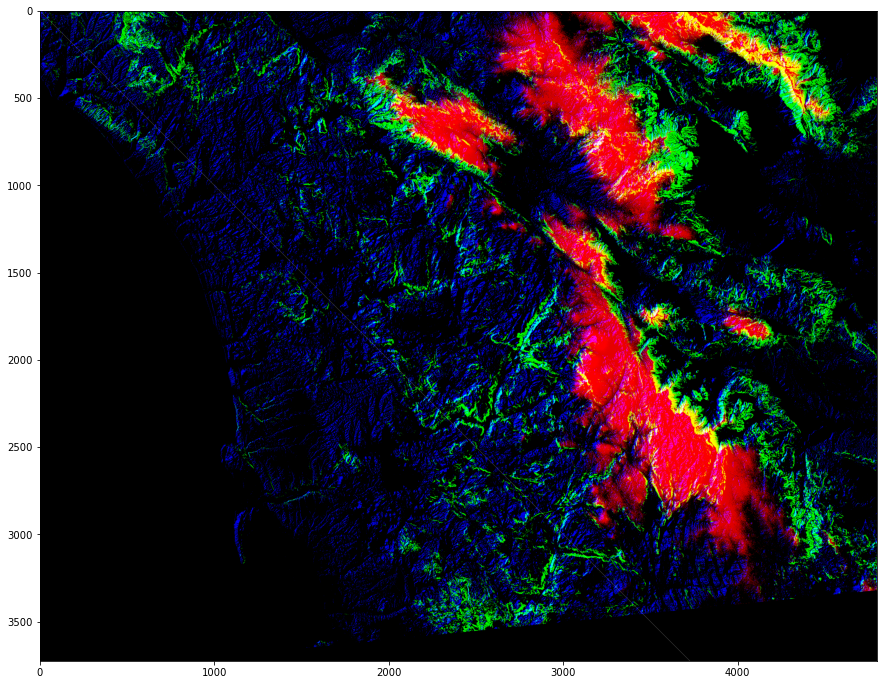

In [18]:
plt.figure(figsize=(15,15))
plt.imshow(photo_data)

<p style="font-family: Arial; font-size:2.75em;color:purple; font-style:bold"><br>
Further Processing of our Satellite Imagery </p>

<p style="font-family: Arial; font-size:1.75em;color:#2462C0; font-style:bold">
Processing of RED Pixels</p>

Remember that red pixels tell us about the height. Let us try to highlight all the high altitude areas. We will do this by detecting high intensity RED Pixels and muting down other areas.

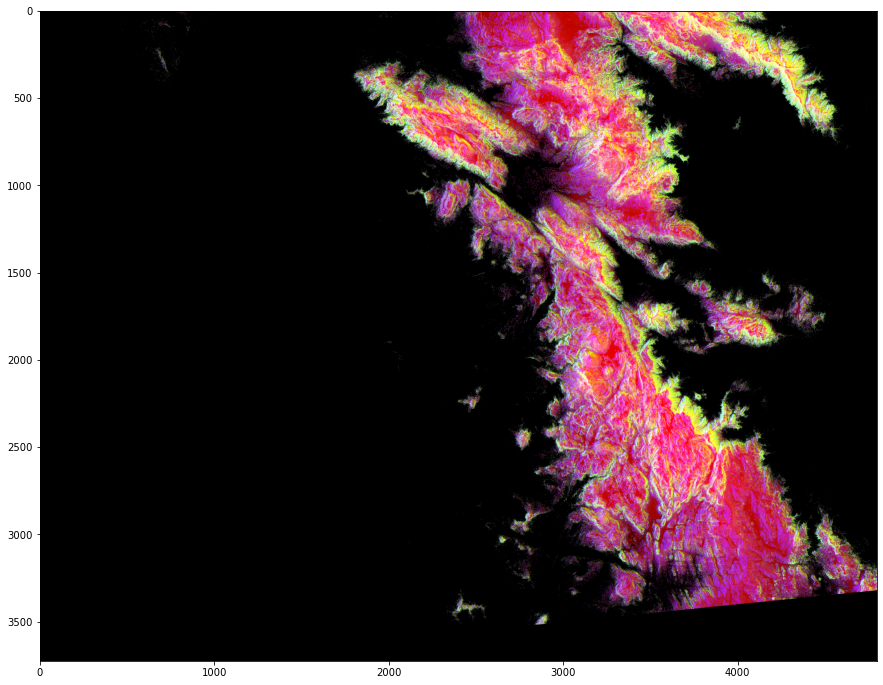

In [19]:
photo_data = imageio.imread('./wifire/sd-3layers.jpg')
red_mask   = photo_data[:, : ,0] < 150

photo_data[red_mask] = 0
plt.figure(figsize=(15,15))
plt.imshow(photo_data)

<p style="font-family: Arial; font-size:1.75em;color:#2462C0; font-style:bold"><br>
Detecting Highl-GREEN Pixels</p>

(3725, 4797)


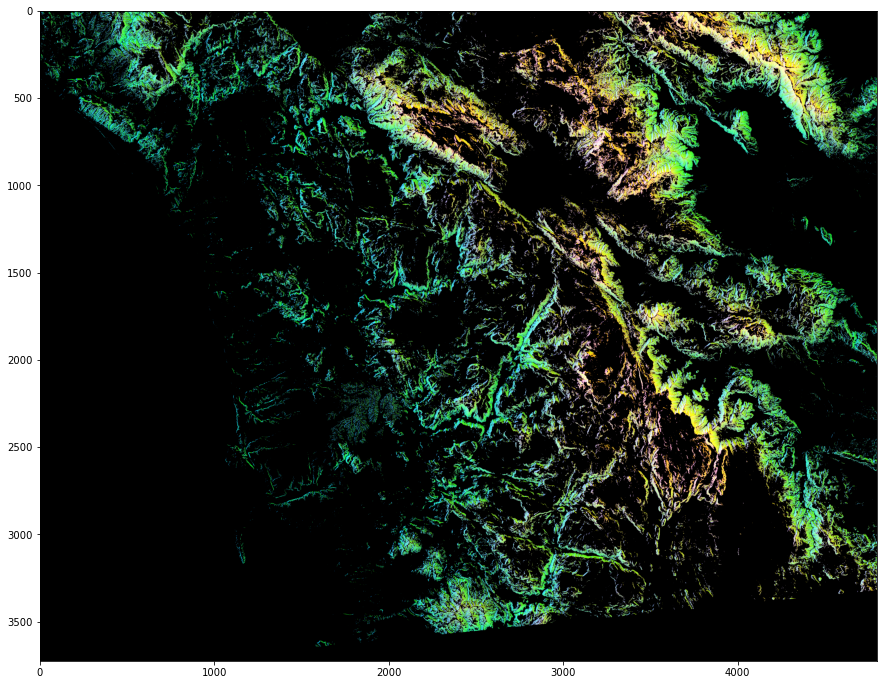

In [20]:
# display the image having high green values, remember the image is RGB

<p style="font-family: Arial; font-size:1.75em;color:#2462C0; font-style:bold"><br>
Detecting Low-BLUE Pixels</p>

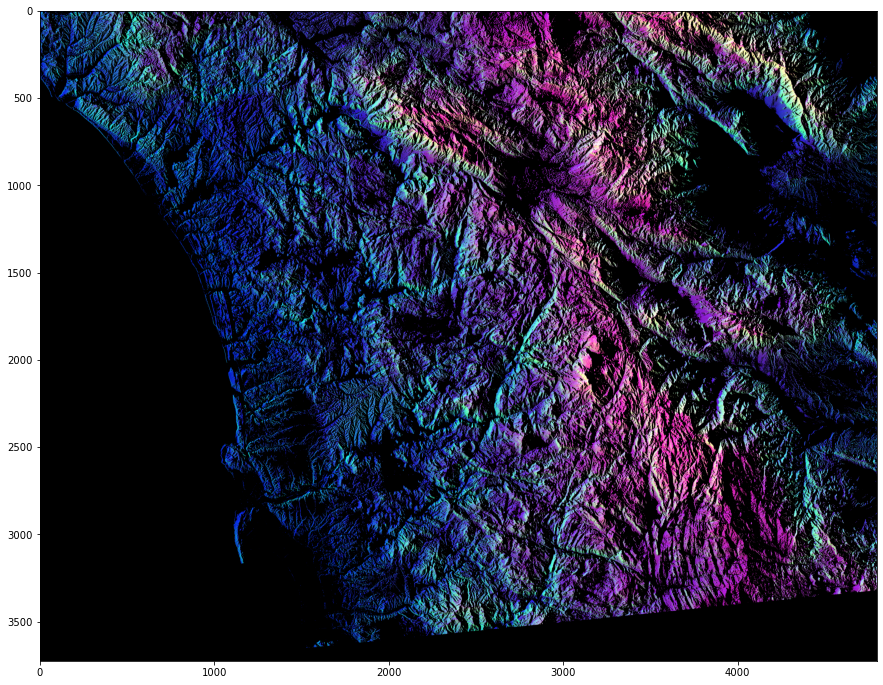

In [22]:
# Here only detect the low blue values according to given threshold and display them

<p style="font-family: Arial; font-size:1.75em;color:#2462C0; font-style:bold"><br>

Composite mask that takes thresholds on all three layers: RED, GREEN, BLUE</p>

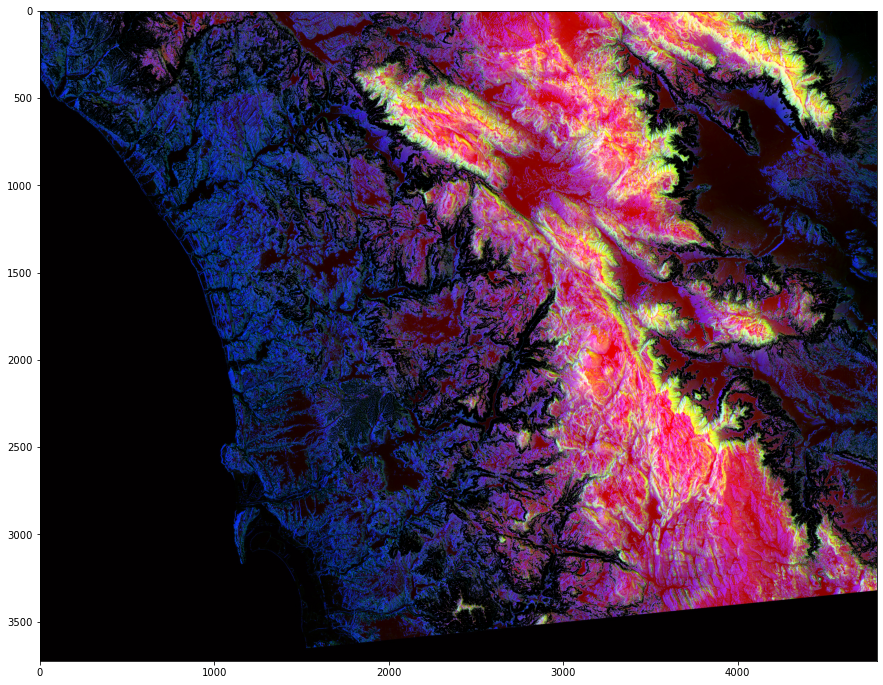

In [23]:
photo_data = imageio.imread('./wifire/sd-3layers.jpg')

red_mask   = photo_data[:, : ,0] < 150
green_mask = photo_data[:, : ,1] > 100
blue_mask  = photo_data[:, : ,2] < 100

final_mask = np.logical_and(red_mask, green_mask, blue_mask)
photo_data[final_mask] = 0
plt.figure(figsize=(15,15))
plt.imshow(photo_data)

In [54]:
final_mask.shape

(3725, 4797)